In [10]:
import matplotlib as mpl
norm = mpl.colors.Normalize(vmin=-1.,vmax=1.)
norm(0.)

0.5

/home/manoj/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


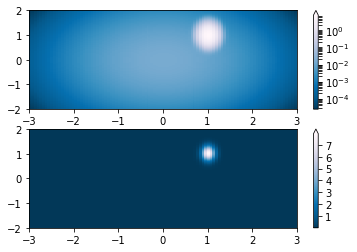

In [11]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib.mlab import bivariate_normal

N = 100
X, Y = np.mgrid[-3:3:complex(0, N), -2:2:complex(0, N)]

# A low hump with a spike coming out of the top right.  Needs to have
# z/colour axis on a log scale so we see both hump and spike.  linear
# scale only shows the spike.
Z1 = bivariate_normal(X, Y, 0.1, 0.2, 1.0, 1.0) +  \
    0.1 * bivariate_normal(X, Y, 1.0, 1.0, 0.0, 0.0)

fig, ax = plt.subplots(2, 1)

pcm = ax[0].pcolor(X, Y, Z1,
                   norm=colors.LogNorm(vmin=Z1.min(), vmax=Z1.max()),
                   cmap='PuBu_r')
fig.colorbar(pcm, ax=ax[0], extend='max')

pcm = ax[1].pcolor(X, Y, Z1, cmap='PuBu_r')
fig.colorbar(pcm, ax=ax[1], extend='max')
fig.show()

/home/manoj/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


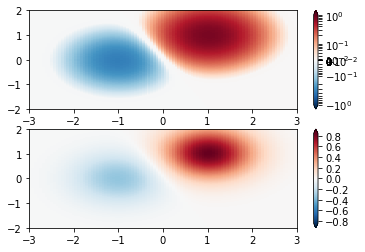

In [12]:
N = 100
X, Y = np.mgrid[-3:3:complex(0, N), -2:2:complex(0, N)]
Z1 = (bivariate_normal(X, Y, 1., 1., 1.0, 1.0))**2  \
    - 0.4 * (bivariate_normal(X, Y, 1.0, 1.0, -1.0, 0.0))**2
Z1 = Z1/0.03

fig, ax = plt.subplots(2, 1)

pcm = ax[0].pcolormesh(X, Y, Z1,
                       norm=colors.SymLogNorm(linthresh=0.03, linscale=0.03,
                                              vmin=-1.0, vmax=1.0),
                       cmap='RdBu_r')
fig.colorbar(pcm, ax=ax[0], extend='both')

pcm = ax[1].pcolormesh(X, Y, Z1, cmap='RdBu_r', vmin=-np.max(Z1))
fig.colorbar(pcm, ax=ax[1], extend='both')
fig.show()

/home/manoj/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


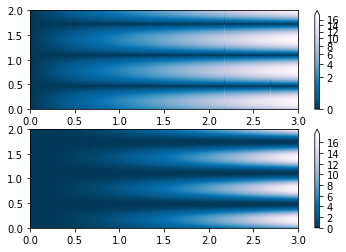

In [13]:
N = 100
X, Y = np.mgrid[0:3:complex(0, N), 0:2:complex(0, N)]
Z1 = (1 + np.sin(Y * 10.)) * X**(2.)

fig, ax = plt.subplots(2, 1)

pcm = ax[0].pcolormesh(X, Y, Z1, norm=colors.PowerNorm(gamma=1./2.),
                       cmap='PuBu_r')
fig.colorbar(pcm, ax=ax[0], extend='max')

pcm = ax[1].pcolormesh(X, Y, Z1, cmap='PuBu_r')
fig.colorbar(pcm, ax=ax[1], extend='max')
fig.show()

/home/manoj/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


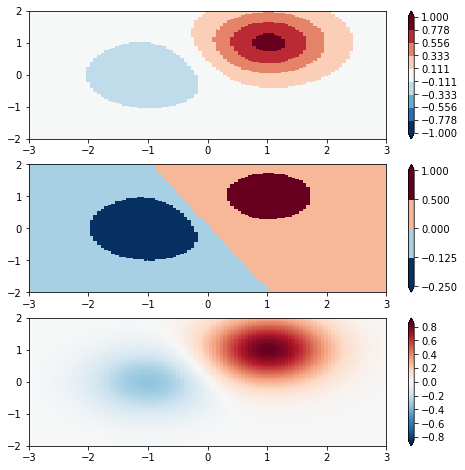

In [14]:
N = 100
X, Y = np.mgrid[-3:3:complex(0, N), -2:2:complex(0, N)]
Z1 = (bivariate_normal(X, Y, 1., 1., 1.0, 1.0))**2  \
    - 0.4 * (bivariate_normal(X, Y, 1.0, 1.0, -1.0, 0.0))**2
Z1 = Z1/0.03

fig, ax = plt.subplots(3, 1, figsize=(8, 8))
ax = ax.flatten()
# even bounds gives a contour-like effect
bounds = np.linspace(-1, 1, 10)
norm = colors.BoundaryNorm(boundaries=bounds, ncolors=256)
pcm = ax[0].pcolormesh(X, Y, Z1,
                       norm=norm,
                       cmap='RdBu_r')
fig.colorbar(pcm, ax=ax[0], extend='both', orientation='vertical')

# uneven bounds changes the colormapping:
bounds = np.array([-0.25, -0.125, 0, 0.5, 1])
norm = colors.BoundaryNorm(boundaries=bounds, ncolors=256)
pcm = ax[1].pcolormesh(X, Y, Z1, norm=norm, cmap='RdBu_r')
fig.colorbar(pcm, ax=ax[1], extend='both', orientation='vertical')

pcm = ax[2].pcolormesh(X, Y, Z1, cmap='RdBu_r', vmin=-np.max(Z1))
fig.colorbar(pcm, ax=ax[2], extend='both', orientation='vertical')
fig.show()

/home/manoj/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


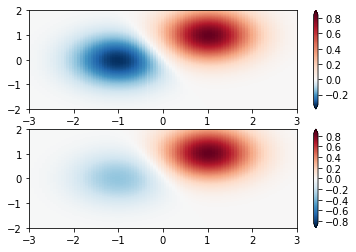

In [15]:
N = 100
X, Y = np.mgrid[-3:3:complex(0, N), -2:2:complex(0, N)]
Z1 = (bivariate_normal(X, Y, 1., 1., 1.0, 1.0))**2  \
    - 0.4 * (bivariate_normal(X, Y, 1.0, 1.0, -1.0, 0.0))**2
Z1 = Z1/0.03


class MidpointNormalize(colors.Normalize):
    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        colors.Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        # I'm ignoring masked values and all kinds of edge cases to make a
        # simple example...
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y))

fig, ax = plt.subplots(2, 1)

pcm = ax[0].pcolormesh(X, Y, Z1,
                       norm=MidpointNormalize(midpoint=0.),
                       cmap='RdBu_r')
fig.colorbar(pcm, ax=ax[0], extend='both')

pcm = ax[1].pcolormesh(X, Y, Z1, cmap='RdBu_r', vmin=-np.max(Z1))
fig.colorbar(pcm, ax=ax[1], extend='both')
fig.show()